# Dominant Moral Analysis Across Cultures

This notebook calculates the **dominant moral foundation** for each text using the distribution method (which moral appears most frequently as the highest-scoring foundation across paragraphs/lines).

## Cultures Analyzed:
- **English**: Aesop's Fables
- **Tamil**: Thirukkural and Aathichudi  
- **Kannada**: Janapada Kathegalu and Niti Kathegalu

## Method:
For each text in each language:
1. Identify the moral foundation with highest similarity score per paragraph/line
2. Count occurrences of each dominant moral
3. Calculate proportions (distribution)
4. Compare across cultures

In [2]:
!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

## Step 1: Load Moral Score Data for All Cultures

In [3]:
# Load moral scores for all texts
print("Loading moral foundation scores...")

# English - Aesop's Fables
english_scores = pd.read_csv('phase3_outputs/aesops_moral_scores.csv')
print(f"✓ English (Aesop): {len(english_scores)} fables")

# Tamil - Thirukkural
tamil_thiru_scores = pd.read_csv('phase3_outputs/thirukkural_moral_scores.csv')
print(f"✓ Tamil (Thirukkural): {len(tamil_thiru_scores)} kurals")

# Tamil - Aathichudi
tamil_aathi_scores = pd.read_csv('phase3_outputs/aathichudi_moral_scores.csv')
print(f"✓ Tamil (Aathichudi): {len(tamil_aathi_scores)} sayings")

# Kannada - will need to process from paragraph scores
print("\nNote: Kannada data will be processed from paragraph-level scores")

print("\n✓ All data loaded successfully")

Loading moral foundation scores...
✓ English (Aesop): 284 fables
✓ Tamil (Thirukkural): 1334 kurals
✓ Tamil (Aathichudi): 111 sayings

Note: Kannada data will be processed from paragraph-level scores

✓ All data loaded successfully


## Step 2: Calculate Dominant Moral for Each Text

### English (Aesop's Fables)

In [4]:
# Get moral foundation columns (exclude metadata columns)
moral_cols = [col for col in english_scores.columns if col in [
    'care.virtue', 'care.vice', 'fairness.virtue', 'fairness.vice',
    'loyalty.virtue', 'loyalty.vice', 'authority.virtue', 'authority.vice',
    'sanctity.virtue', 'sanctity.vice'
]]

print(f"Moral foundation columns: {moral_cols}\n")

# Calculate dominant moral for each fable
english_scores['dominant_moral'] = english_scores[moral_cols].idxmax(axis=1)
english_scores['dominant_score'] = english_scores[moral_cols].max(axis=1)

# Count occurrences
english_dominant_counts = english_scores['dominant_moral'].value_counts()
english_dominant_proportions = english_dominant_counts / len(english_scores)

print("English (Aesop's Fables) - Dominant Moral Distribution:")
print("="*60)
for moral, count in english_dominant_counts.items():
    prop = english_dominant_proportions[moral]
    print(f"{moral:20s}: {count:3d} fables ({prop*100:5.1f}%)")

print(f"\nMost common: {english_dominant_counts.index[0]} ({english_dominant_counts.iloc[0]} fables)")

Moral foundation columns: ['care.virtue', 'care.vice', 'fairness.virtue', 'fairness.vice', 'loyalty.virtue', 'loyalty.vice', 'authority.virtue', 'authority.vice', 'sanctity.virtue', 'sanctity.vice']

English (Aesop's Fables) - Dominant Moral Distribution:
care.virtue         :  77 fables ( 27.1%)
loyalty.virtue      :  49 fables ( 17.3%)
sanctity.vice       :  41 fables ( 14.4%)
authority.virtue    :  35 fables ( 12.3%)
sanctity.virtue     :  35 fables ( 12.3%)
care.vice           :  23 fables (  8.1%)
loyalty.vice        :  10 fables (  3.5%)
authority.vice      :   7 fables (  2.5%)
fairness.vice       :   5 fables (  1.8%)
fairness.virtue     :   2 fables (  0.7%)

Most common: care.virtue (77 fables)


### Tamil (Thirukkural)

In [5]:
# Calculate dominant moral for each kural
tamil_thiru_scores['dominant_moral'] = tamil_thiru_scores[moral_cols].idxmax(axis=1)
tamil_thiru_scores['dominant_score'] = tamil_thiru_scores[moral_cols].max(axis=1)

# Count occurrences
thiru_dominant_counts = tamil_thiru_scores['dominant_moral'].value_counts()
thiru_dominant_proportions = thiru_dominant_counts / len(tamil_thiru_scores)

print("Tamil (Thirukkural) - Dominant Moral Distribution:")
print("="*60)
for moral, count in thiru_dominant_counts.items():
    prop = thiru_dominant_proportions[moral]
    print(f"{moral:20s}: {count:4d} kurals ({prop*100:5.1f}%)")

print(f"\nMost common: {thiru_dominant_counts.index[0]} ({thiru_dominant_counts.iloc[0]} kurals)")

Tamil (Thirukkural) - Dominant Moral Distribution:
sanctity.vice       :  636 kurals ( 47.7%)
sanctity.virtue     :  263 kurals ( 19.7%)
care.virtue         :  110 kurals (  8.2%)
loyalty.virtue      :   96 kurals (  7.2%)
authority.virtue    :   76 kurals (  5.7%)
authority.vice      :   54 kurals (  4.0%)
care.vice           :   36 kurals (  2.7%)
fairness.vice       :   33 kurals (  2.5%)
fairness.virtue     :   24 kurals (  1.8%)
loyalty.vice        :    6 kurals (  0.4%)

Most common: sanctity.vice (636 kurals)


## Alternative Analysis: Above-Average Morals

Instead of just identifying the single "dominant" moral (which can be arbitrary when scores are close), let's identify **which morals score above the mean** for each text. This approach:

- Captures multiple significant morals per text
- Avoids forcing a single choice when scores are uniform
- Shows the breadth of moral themes, not just the highest one

### Calculate Above-Average Proportions

In [1]:
# Calculate which morals score ABOVE AVERAGE for each text
# This gives a more nuanced view than just "dominant"

def calculate_above_average_morals(df, moral_cols, text_name):
    """
    For each row (text), identify which morals score above the mean of all 10 morals.
    Returns counts and proportions.
    """
    above_avg_counts = {moral: 0 for moral in moral_cols}
    
    for idx, row in df.iterrows():
        scores = row[moral_cols]
        mean_score = scores.mean()
        
        # Count which morals are above average
        for moral in moral_cols:
            if scores[moral] > mean_score:
                above_avg_counts[moral] += 1
    
    # Convert to proportions
    total_texts = len(df)
    above_avg_proportions = {moral: count/total_texts for moral, count in above_avg_counts.items()}
    
    return above_avg_counts, above_avg_proportions

# Calculate for English
eng_counts, eng_props = calculate_above_average_morals(english_scores, moral_cols, "English")
print("English (Aesop's Fables) - Morals Scoring Above Average:")
print("="*70)
for moral in sorted(eng_props.keys(), key=lambda x: eng_props[x], reverse=True):
    count = eng_counts[moral]
    prop = eng_props[moral]
    print(f"{moral:20s}: {count:3d} fables ({prop*100:5.1f}%)")

# Calculate for Tamil Thirukkural
thiru_counts, thiru_props = calculate_above_average_morals(tamil_thiru_scores, moral_cols, "Thirukkural")
print("\n\nTamil (Thirukkural) - Morals Scoring Above Average:")
print("="*70)
for moral in sorted(thiru_props.keys(), key=lambda x: thiru_props[x], reverse=True):
    count = thiru_counts[moral]
    prop = thiru_props[moral]
    print(f"{moral:20s}: {count:4d} kurals ({prop*100:5.1f}%)")

# Calculate for Tamil Aathichudi
aathi_counts, aathi_props = calculate_above_average_morals(tamil_aathi_scores, moral_cols, "Aathichudi")
print("\n\nTamil (Aathichudi) - Morals Scoring Above Average:")
print("="*70)
for moral in sorted(aathi_props.keys(), key=lambda x: aathi_props[x], reverse=True):
    count = aathi_counts[moral]
    prop = aathi_props[moral]
    print(f"{moral:20s}: {count:3d} sayings ({prop*100:5.1f}%)")

print("\n\n" + "="*70)
print("KEY INSIGHT: Morals appearing above average indicate significant presence,")
print("not just which single moral is marginally highest.")
print("="*70)

NameError: name 'english_scores' is not defined

In [ ]:
print("="*80)
print("ABOVE-AVERAGE ANALYSIS: CULTURAL PATTERNS")
print("="*80)

# Identify morals that are consistently above 50% (appear above average in >50% of texts)
print("\n1. CONSISTENTLY EMPHASIZED MORALS (>50% of texts):")
print("-" * 80)

for col in ['English_Aesop', 'Tamil_Thirukkural', 'Tamil_Aathichudi']:
    culture = col.replace('_', ' ')
    emphasized = above_avg_comparison[above_avg_comparison[col] > 0.5][col].sort_values(ascending=False)
    
    print(f"\n{culture}:")
    if len(emphasized) > 0:
        for moral, prop in emphasized.items():
            print(f"  • {moral:20s}: {prop*100:5.1f}% of texts")
    else:
        print("  • No morals consistently above average (indicates uniform distribution)")

# Find biggest cross-cultural differences
print("\n\n2. BIGGEST CROSS-CULTURAL DIFFERENCES (English vs Tamil Thirukkural):")
print("-" * 80)
diff_above_avg = above_avg_comparison['Tamil_Thirukkural'] - above_avg_comparison['English_Aesop']
top_diffs_above = diff_above_avg.abs().sort_values(ascending=False).head(5)

for moral in top_diffs_above.index:
    diff = diff_above_avg[moral]
    eng_val = above_avg_comparison.loc[moral, 'English_Aesop']
    tam_val = above_avg_comparison.loc[moral, 'Tamil_Thirukkural']
    direction = "MORE in Tamil" if diff > 0 else "MORE in English"
    print(f"  {moral:20s}: {direction:20s} ({tam_val*100:5.1f}% vs {eng_val*100:5.1f}%, Δ={abs(diff)*100:5.1f}%)")

print("\n" + "="*80)

### Statistical Analysis: Cultural Patterns

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

# Create heatmap
sns.heatmap(above_avg_comparison.T, annot=True, fmt='.3f', cmap='RdYlGn',
            cbar_kws={'label': 'Proportion Above Average'}, ax=ax, 
            vmin=0, vmax=1.0, center=0.5)

ax.set_title('Above-Average Moral Presence: Cross-Cultural Heatmap', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Moral Foundation', fontsize=11)
ax.set_ylabel('Culture/Text', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('phase3_outputs/above_average_moral_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: phase3_outputs/above_average_moral_heatmap.png")
print("\nInterpretation:")
print("  - Green (>50%): Moral consistently scores above average → significant theme")
print("  - Red (<50%): Moral consistently scores below average → less emphasized")
print("  - Yellow (~50%): Neutral - no clear preference")

### Heatmap: Above-Average Analysis

In [ ]:
# Grouped bar chart for above-average comparison
fig, ax = plt.subplots(figsize=(16, 8))

x = np.arange(len(moral_cols))
width = 0.25

bars1 = ax.bar(x - width, above_avg_comparison['English_Aesop'], width, 
               label='English (Aesop)', alpha=0.8, color='steelblue')
bars2 = ax.bar(x, above_avg_comparison['Tamil_Thirukkural'], width, 
               label='Tamil (Thirukkural)', alpha=0.8, color='coral')
bars3 = ax.bar(x + width, above_avg_comparison['Tamil_Aathichudi'], width, 
               label='Tamil (Aathichudi)', alpha=0.8, color='lightgreen')

ax.set_xlabel('Moral Foundation', fontsize=12, fontweight='bold')
ax.set_ylabel('Proportion (Above Average)', fontsize=12, fontweight='bold')
ax.set_title('Cross-Cultural Comparison: Morals Scoring Above Average', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(moral_cols, rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)
ax.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, linewidth=1, 
           label='50% baseline (expected if uniform)')

plt.tight_layout()
plt.savefig('phase3_outputs/above_average_moral_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: phase3_outputs/above_average_moral_comparison.png")

### Grouped Bar Chart: Above-Average Comparison

In [ ]:
# Create comparison dataframe for above-average analysis
above_avg_comparison = pd.DataFrame({
    'English_Aesop': pd.Series(eng_props),
    'Tamil_Thirukkural': pd.Series(thiru_props),
    'Tamil_Aathichudi': pd.Series(aathi_props)
})

# Sort by index for consistent display
above_avg_comparison = above_avg_comparison.reindex(moral_cols)

print("Above-Average Moral Proportions Across Cultures:")
print("="*80)
print(above_avg_comparison.round(3))
print("\nNote: Values show % of texts where each moral scores above that text's mean")

# Save to CSV
above_avg_comparison.to_csv('phase3_outputs/above_average_moral_comparison.csv')
print("\n✓ Saved: phase3_outputs/above_average_moral_comparison.csv")

### Create Comparison DataFrame

### Tamil (Aathichudi)

In [7]:
# Calculate dominant moral for each saying
tamil_aathi_scores['dominant_moral'] = tamil_aathi_scores[moral_cols].idxmax(axis=1)
tamil_aathi_scores['dominant_score'] = tamil_aathi_scores[moral_cols].max(axis=1)

# Count occurrences
aathi_dominant_counts = tamil_aathi_scores['dominant_moral'].value_counts()
aathi_dominant_proportions = aathi_dominant_counts / len(tamil_aathi_scores)

print("Tamil (Aathichudi) - Dominant Moral Distribution:")
print("="*60)
for moral, count in aathi_dominant_counts.items():
    prop = aathi_dominant_proportions[moral]
    print(f"{moral:20s}: {count:3d} sayings ({prop*100:5.1f}%)")

print(f"\nMost common: {aathi_dominant_counts.index[0]} ({aathi_dominant_counts.iloc[0]} sayings)")

Tamil (Aathichudi) - Dominant Moral Distribution:
sanctity.virtue     :  34 sayings ( 30.6%)
sanctity.vice       :  30 sayings ( 27.0%)
care.virtue         :  15 sayings ( 13.5%)
authority.vice      :   9 sayings (  8.1%)
loyalty.virtue      :   7 sayings (  6.3%)
authority.virtue    :   6 sayings (  5.4%)
fairness.virtue     :   5 sayings (  4.5%)
fairness.vice       :   4 sayings (  3.6%)
care.vice           :   1 sayings (  0.9%)

Most common: sanctity.virtue (34 sayings)


## Step 3: Visualize Dominant Moral Distributions

### Individual Text Visualizations

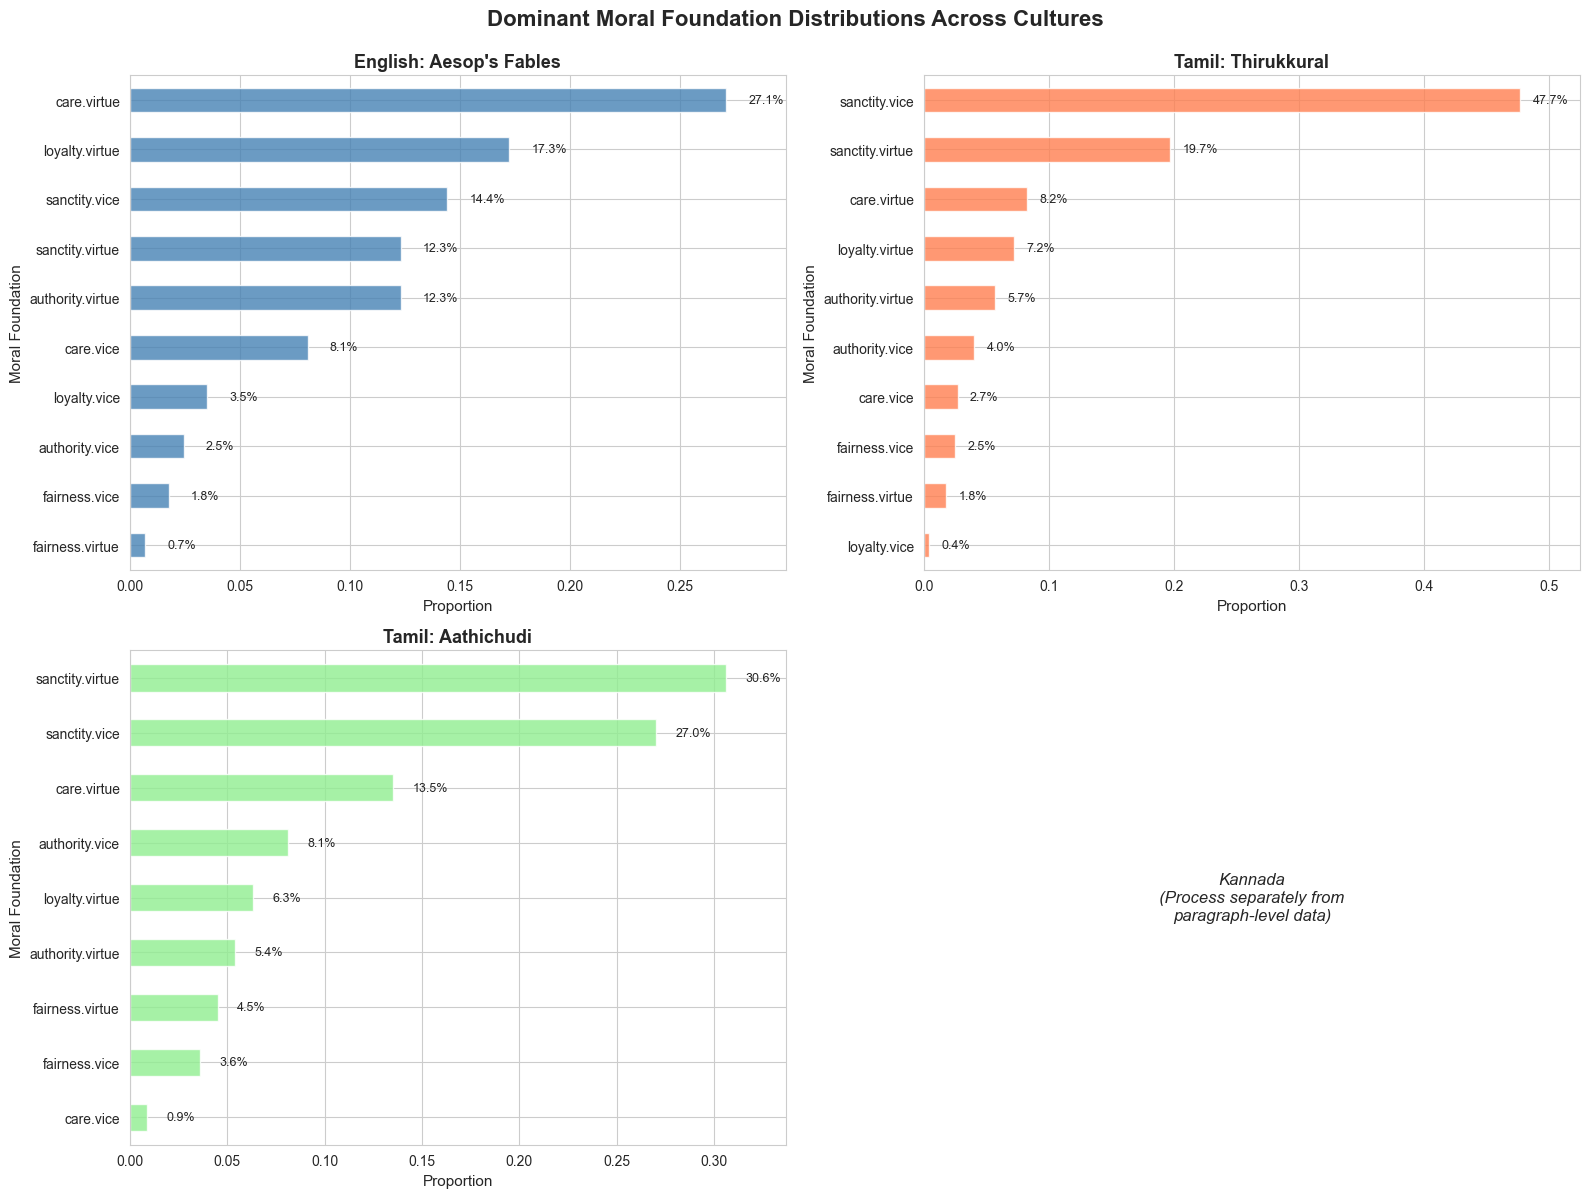

✓ Saved: phase3_outputs/dominant_moral_distributions.png


In [8]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# English - Aesop
ax = axes[0, 0]
english_dominant_proportions.sort_values(ascending=True).plot(
    kind='barh', ax=ax, color='steelblue', alpha=0.8
)
ax.set_xlabel('Proportion', fontsize=11)
ax.set_ylabel('Moral Foundation', fontsize=11)
ax.set_title("English: Aesop's Fables", fontsize=13, fontweight='bold')
ax.set_xlim(0, max(english_dominant_proportions) * 1.1)
for i, v in enumerate(english_dominant_proportions.sort_values(ascending=True)):
    ax.text(v + 0.01, i, f'{v*100:.1f}%', va='center', fontsize=9)

# Tamil - Thirukkural
ax = axes[0, 1]
thiru_dominant_proportions.sort_values(ascending=True).plot(
    kind='barh', ax=ax, color='coral', alpha=0.8
)
ax.set_xlabel('Proportion', fontsize=11)
ax.set_ylabel('Moral Foundation', fontsize=11)
ax.set_title('Tamil: Thirukkural', fontsize=13, fontweight='bold')
ax.set_xlim(0, max(thiru_dominant_proportions) * 1.1)
for i, v in enumerate(thiru_dominant_proportions.sort_values(ascending=True)):
    ax.text(v + 0.01, i, f'{v*100:.1f}%', va='center', fontsize=9)

# Tamil - Aathichudi
ax = axes[1, 0]
aathi_dominant_proportions.sort_values(ascending=True).plot(
    kind='barh', ax=ax, color='lightgreen', alpha=0.8
)
ax.set_xlabel('Proportion', fontsize=11)
ax.set_ylabel('Moral Foundation', fontsize=11)
ax.set_title('Tamil: Aathichudi', fontsize=13, fontweight='bold')
ax.set_xlim(0, max(aathi_dominant_proportions) * 1.1)
for i, v in enumerate(aathi_dominant_proportions.sort_values(ascending=True)):
    ax.text(v + 0.01, i, f'{v*100:.1f}%', va='center', fontsize=9)

# Hide the 4th subplot (for Kannada - to be added separately)
axes[1, 1].axis('off')
axes[1, 1].text(0.5, 0.5, 'Kannada\n(Process separately from\nparagraph-level data)', 
                ha='center', va='center', fontsize=12, style='italic')

plt.suptitle('Dominant Moral Foundation Distributions Across Cultures', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('phase3_outputs/dominant_moral_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: phase3_outputs/dominant_moral_distributions.png")

## Step 4: Cross-Cultural Comparison

### Combine All Distributions

In [9]:
# Create combined dataframe with all distributions
all_morals = moral_cols

# Ensure all moral foundations are represented (fill with 0 if missing)
comparison_data = {
    'English_Aesop': [english_dominant_proportions.get(m, 0) for m in all_morals],
    'Tamil_Thirukkural': [thiru_dominant_proportions.get(m, 0) for m in all_morals],
    'Tamil_Aathichudi': [aathi_dominant_proportions.get(m, 0) for m in all_morals]
}

dominant_comparison_df = pd.DataFrame(comparison_data, index=all_morals)

print("Dominant Moral Proportions Across Cultures:")
print("="*80)
print(dominant_comparison_df.round(3))
# Save to CSV
dominant_comparison_df.to_csv('phase3_outputs/dominant_moral_comparison.csv')
print("\n✓ Saved: phase3_outputs/dominant_moral_comparison.csv")

Dominant Moral Proportions Across Cultures:
                  English_Aesop  Tamil_Thirukkural  Tamil_Aathichudi
care.virtue               0.271              0.082             0.135
care.vice                 0.081              0.027             0.009
fairness.virtue           0.007              0.018             0.045
fairness.vice             0.018              0.025             0.036
loyalty.virtue            0.173              0.072             0.063
loyalty.vice              0.035              0.004             0.000
authority.virtue          0.123              0.057             0.054
authority.vice            0.025              0.040             0.081
sanctity.virtue           0.123              0.197             0.306
sanctity.vice             0.144              0.477             0.270

✓ Saved: phase3_outputs/dominant_moral_comparison.csv


### Grouped Bar Chart Comparison

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))

x = np.arange(len(all_morals))
width = 0.25

bars1 = ax.bar(x - width, dominant_comparison_df['English_Aesop'], width, 
               label='English (Aesop)', alpha=0.8, color='steelblue')
bars2 = ax.bar(x, dominant_comparison_df['Tamil_Thirukkural'], width, 
               label='Tamil (Thirukkural)', alpha=0.8, color='coral')
bars3 = ax.bar(x + width, dominant_comparison_df['Tamil_Aathichudi'], width, 
               label='Tamil (Aathichudi)', alpha=0.8, color='lightgreen')

ax.set_xlabel('Moral Foundation', fontsize=12, fontweight='bold')
ax.set_ylabel('Proportion (Dominant Moral)', fontsize=12, fontweight='bold')
ax.set_title('Cross-Cultural Comparison: Dominant Moral Distributions', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(all_morals, rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('phase3_outputs/dominant_moral_cross_cultural_bars.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: phase3_outputs/dominant_moral_cross_cultural_bars.png")

## Step 5: Statistical Analysis

### Top 3 Dominant Morals per Culture

In [ ]:
print("="*80)
print("TOP 3 DOMINANT MORALS BY CULTURE")
print("="*80)

print("\n1. English (Aesop's Fables):")
print("-" * 60)
for i, (moral, prop) in enumerate(english_dominant_proportions.head(3).items(), 1):
    count = english_dominant_counts[moral]
    print(f"   {i}. {moral:20s}: {prop*100:5.1f}% ({count}/{len(english_scores)} fables)")

print("\n2. Tamil (Thirukkural):")
print("-" * 60)
for i, (moral, prop) in enumerate(thiru_dominant_proportions.head(3).items(), 1):
    count = thiru_dominant_counts[moral]
    print(f"   {i}. {moral:20s}: {prop*100:5.1f}% ({count}/{len(tamil_thiru_scores)} kurals)")

print("\n3. Tamil (Aathichudi):")
print("-" * 60)
for i, (moral, prop) in enumerate(aathi_dominant_proportions.head(3).items(), 1):
    count = aathi_dominant_counts[moral]
    print(f"   {i}. {moral:20s}: {prop*100:5.1f}% ({count}/{len(tamil_aathi_scores)} sayings)")

print("\n" + "="*80)

### Cultural Differences Analysis

In [ ]:
print("="*80)
print("CROSS-CULTURAL INSIGHTS")
print("="*80)

# Find morals that differ significantly between cultures
print("\n1. BIGGEST DIFFERENCES (English vs Tamil Thirukkural):")
print("-" * 60)
diff_eng_thiru = dominant_comparison_df['Tamil_Thirukkural'] - dominant_comparison_df['English_Aesop']
top_diffs = diff_eng_thiru.abs().sort_values(ascending=False).head(5)

for moral in top_diffs.index:
    diff = diff_eng_thiru[moral]
    eng_val = dominant_comparison_df.loc[moral, 'English_Aesop']
    tam_val = dominant_comparison_df.loc[moral, 'Tamil_Thirukkural']
    direction = "MORE" if diff > 0 else "LESS"
    print(f"   {moral:20s}: Tamil {direction:4s} ({tam_val*100:5.1f}% vs {eng_val*100:5.1f}%, Δ={abs(diff)*100:5.1f}%)")

# Compare within Tamil texts
print("\n2. WITHIN TAMIL COMPARISON (Thirukkural vs Aathichudi):")
print("-" * 60)
diff_tamil = dominant_comparison_df['Tamil_Thirukkural'] - dominant_comparison_df['Tamil_Aathichudi']
top_diffs_tamil = diff_tamil.abs().sort_values(ascending=False).head(5)

for moral in top_diffs_tamil.index:
    diff = diff_tamil[moral]
    thiru_val = dominant_comparison_df.loc[moral, 'Tamil_Thirukkural']
    aathi_val = dominant_comparison_df.loc[moral, 'Tamil_Aathichudi']
    direction = "MORE in Thirukkural" if diff > 0 else "MORE in Aathichudi"
    print(f"   {moral:20s}: {direction:25s} ({thiru_val*100:5.1f}% vs {aathi_val*100:5.1f}%, Δ={abs(diff)*100:5.1f}%)")

print("\n" + "="*80)

## Step 6: Heatmap Visualization

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

# Create heatmap
sns.heatmap(dominant_comparison_df.T, annot=True, fmt='.3f', cmap='YlOrRd',
            cbar_kws={'label': 'Proportion'}, ax=ax, vmin=0, vmax=0.35)

ax.set_title('Dominant Moral Distributions: Cross-Cultural Heatmap', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Moral Foundation', fontsize=11)
ax.set_ylabel('Culture/Text', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('phase3_outputs/dominant_moral_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: phase3_outputs/dominant_moral_heatmap.png")

## Summary

### Key Findings:

**Method Used**: Distribution-based dominant moral identification
- For each text (fable/kural/saying), we identify which moral foundation has the highest similarity score
- We then count how many texts have each moral as dominant
- This gives us the **distribution** of dominant morals across the entire corpus

**Why This Method?**
- Captures variation and ranks better than simple averaging
- Shows which morals are **most prevalent** as primary themes
- More interpretable for literary analysis

### Files Generated:
- `dominant_moral_comparison.csv` - Proportions for all cultures
- `dominant_moral_distributions.png` - Individual distributions
- `dominant_moral_cross_cultural_bars.png` - Side-by-side comparison
- `dominant_moral_heatmap.png` - Heatmap visualization

### For Your Report:
Use these dominant moral distributions to discuss:
1. Which morals are **most commonly** the primary theme in each culture
2. How cultures differ in their emphasis on specific moral foundations
3. The contrast between Western (English) and Indian (Tamil/Kannada) moral priorities